In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
train_dir = "C:/Users/Ravi Abhinav/Documents/FER 2013/train"
test_dir = "C:/Users/Ravi Abhinav/Documents/FER 2013/test"

In [3]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
# Load and preprocess the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='PReLU', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='PReLU'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='PReLU'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='PReLU'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(7, activation='softmax')
])


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)

Epoch 1/50
449/449 [==============================] - 291s 646ms/step - loss: 2.1814 - accuracy: 0.2079 - val_loss: 1.8915 - val_accuracy: 0.2524
Epoch 2/50
449/449 [==============================] - 122s 272ms/step - loss: 1.8246 - accuracy: 0.2577 - val_loss: 1.7495 - val_accuracy: 0.2549
Epoch 3/50
449/449 [==============================] - 123s 274ms/step - loss: 1.7499 - accuracy: 0.2887 - val_loss: 1.6311 - val_accuracy: 0.3254
Epoch 4/50
449/449 [==============================] - 128s 285ms/step - loss: 1.6983 - accuracy: 0.3146 - val_loss: 1.5585 - val_accuracy: 0.4110
Epoch 5/50
449/449 [==============================] - 135s 300ms/step - loss: 1.6431 - accuracy: 0.3443 - val_loss: 1.5215 - val_accuracy: 0.4054
Epoch 6/50
449/449 [==============================] - 131s 293ms/step - loss: 1.5902 - accuracy: 0.3744 - val_loss: 1.5769 - val_accuracy: 0.3785
Epoch 7/50
449/449 [==============================] - 127s 283ms/step - loss: 1.5607 - accuracy: 0.3918 - val_loss: 1.4689 -

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

113/113 [==============================] - 37s 329ms/step - loss: 1.1233 - accuracy: 0.5723
Test Accuracy: 57.23%


In [11]:
# Predict on a new image
def predict_emotion(image_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    prediction = model.predict(img)
    return np.argmax(prediction)

image_path = "C:/Users/Ravi Abhinav/Documents/img recog/ajay.jpg"
emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {emotion}')

1/1 [==============================] - 0s 300ms/step
Predicted Emotion: 3


In [12]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}


In [13]:
from PIL import Image
imge = Image.open(image_path)
print(imge)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=992x1280 at 0x20D763577C0>


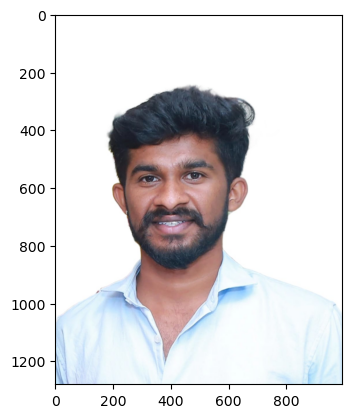

In [14]:
import matplotlib.pyplot as plt
imge = plt.imread(image_path)
plt.imshow(imge)
plt.show()

In [15]:
label_dict[emotion]

'Happy'

In [ ]:
emotion = predict_emotion(imh)
print(f'Predicted Emotion: {label_dict[emotion]}')

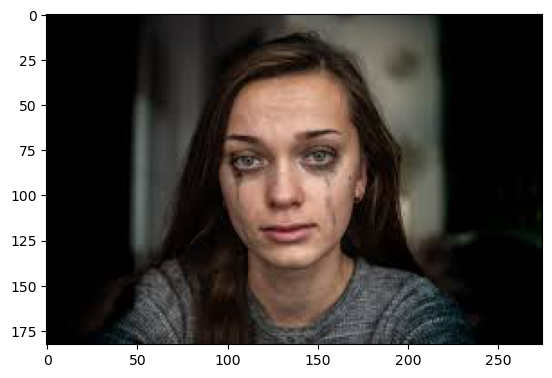

1/1 [==============================] - 0s 17ms/step
Predicted Emotion: Sad


In [19]:
imh2 = "C:/Users/Ravi Abhinav/Desktop/crying.jpeg"
img32 = plt.imread("C:/Users/Ravi Abhinav/Desktop/crying.jpeg")
plt.imshow(img32)
plt.show()

emotion = predict_emotion(imh2)
print(f'Predicted Emotion: {label_dict[emotion]}')

In [20]:
model.save('C:/Users/Ravi Abhinav/Desktop/abhi_emotion_recognition_model.h5')
